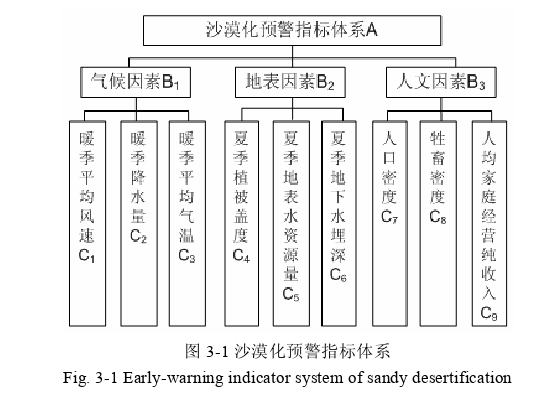

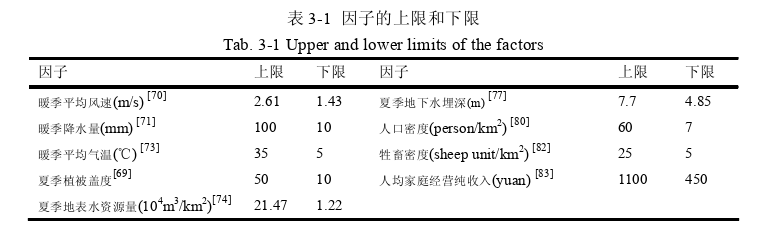

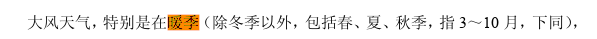

In [1]:
WIND='暖季平均风速(m/s)'
RAIN='暖季降水量(mm)'
TEMP='暖季平均气温(℃)'

PLANT='夏季植被盖度'
WATER='夏季地表水资源量(104m3/km2)'
UNDER_WATER='夏季地下水埋深(m)'

PERSON='人口密度(person/km2)'
SHEEP='牲畜密度(sheep unit/km2)'
MONEY='人均家庭经营纯收入(yuan)'


In [2]:
UPPER={
    WIND: 2.61,
    RAIN: 100,
    TEMP: 35,
    PLANT: 50,
    WATER: 21.47,
    UNDER_WATER: 7.7,
    PERSON: 60,
    SHEEP: 25,
    MONEY: 1100,
}
LOWER={
    WIND: 1.43,
    RAIN: 10,
    TEMP: 5,
    PLANT: 10,
    WATER: 1.22,
    UNDER_WATER: 4.85,
    PERSON: 7,
    SHEEP: 5,
    MONEY: 450,
}

In [6]:
def Q_Wind(x):
    if x>=UPPER[WIND]:
        return 1
    if x<LOWER[WIND]:
        return 0
    val=(x-LOWER[WIND])/(UPPER[WIND]-LOWER[WIND])
    return val

def Q_Rain(x):
    if x<10:
        return 1
    if x>100:
        return 0
    val = (100-x)/(100-10)
    return val

def Q_Temp(x):
    if 25<=x<=30:
        return 0
    if x<5 or x>35:
        return 1
    if 5<=x<=25:
        return (25-x)/(25-5)
    if 30<x<=35:
        return (x-30)
    
def Q_Plant(x):
    if x>=50:
        return 0
    if x<10:
        return 1
    return (50-x)/(50-10)

def Q_Water(x):
    pass

def Q_UnderWater(x):
    if x>UPPER[UNDER_WATER]:
        return 1
    if x<LOWER[UNDER_WATER]:
        return 0
    return (x-LOWER[UNDER_WATER])/(UPPER[UNDER_WATER]-LOWER[UNDER_WATER])

def Q_Person(x):
    if x>=60:
        return 1
    if x<7:
        return 0
    return (x-7)/(60-7)

def Q_Sheep(x):
    if x<5:
        return 0
    if x>=25:
        return 1
    return (x-5)/(25-5)

def Q_Money(x):
    if x>=1100:
        return 1
    if x<450:
        return 0
    return (x-450)/(1100-450)


In [7]:
Q_map={
    WIND: Q_Wind,
    RAIN: Q_Rain,
    TEMP: Q_Temp,
    PLANT: Q_Plant,
    WATER: Q_Water,
    UNDER_WATER: Q_UnderWater,
    PERSON: Q_Person,
    SHEEP: Q_Sheep,
    MONEY: Q_Money,
}

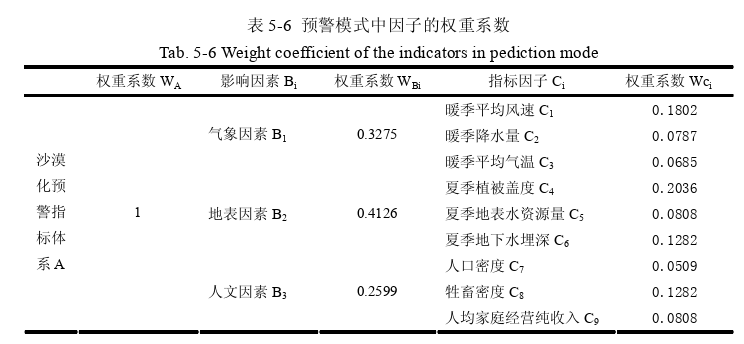

In [5]:
WEIGHT_COEFF={
    WIND: 0.1802,
    RAIN: 0.0787,
    TEMP: 0.0685,
    PLANT: 0.2036,
    WATER: 0.0808,
    UNDER_WATER: 0.1282,
    PERSON: 0.0509,
    SHEEP: 0.1282,
    MONEY: 0.0808,
}

sum(WEIGHT_COEFF.values())

0.9998999999999999

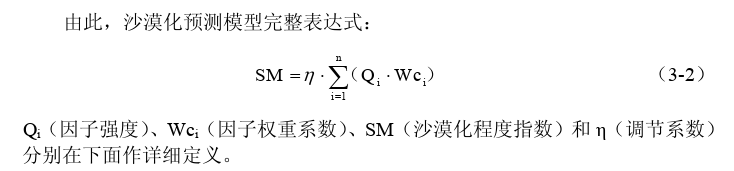

In [8]:
def compute_SM(Q_raw: dict, eta: float):
    Q1={key: Q_map[key](val) for key, val in Q_raw.items()}
    Q2={key: val*WEIGHT_COEFF[key] for key, val in Q1.items()}
    SM1=sum(Q2.values())
    SM2=SM1*eta
    return Q1,Q2,SM1,SM2